#2-1. Nate 뉴스기사 제목 스크래핑하기

======> https://news.nate.com/recent?mid=n0200 정치 뉴스 <======
외교부, 루비오 美국무장관 방한설에 "트럼프 2기 출범 후부터 추진"
사이트 : https://news.nate.com/view/20250409n36929?mid=n0200
이미지 링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/mt/2025/04/09/mt_1744193345134_137587_0.jpg


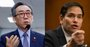

헌법재판관 지명 후폭풍…"권한 없어 무효" "이재명이 임명?"
사이트 : https://news.nate.com/view/20250409n37078?mid=n0200
이미지 링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/yn/2025/04/09/202504091901439910_t.jpg


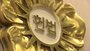

이재명, 8일 대선 출마 선언…"국민과 역경 이겨낼 것"
사이트 : https://news.nate.com/view/20250409n37017?mid=n0200
이미지 링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/hn/2025/04/09/20250409503902.jpg


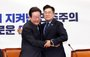

24시간도 안걸린 이완규 인사검증…윤 파면 전 '낙점' 의혹
사이트 : https://news.nate.com/view/20250409n37016?mid=n0200
이미지 링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/hn/2025/04/09/20250409503895.jpg


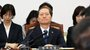

'단체장 행위금지' 혁신당·담양군 정책협의회 취소
사이트 : https://news.nate.com/view/20250409n37002?mid=n0200
이미지 링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/yt/2025/04/09/PYH2025040310300005400_P2.jpg


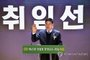

###############################
=====요청하신 Key가 없습니다.=====
###############################
======> https://news.nate.com/recent?mid=n0100 최신 뉴스 <======
[단독] "드디어 나왔다" 지드래곤 새 뮤비, '이노베이트코리아'서 최초 공개
사이트 : https://news.nate.com/view/20250409n37185?mid=n0100
이미지 링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/hr/2025/04/09/news-p.v1.20250409.9beddc0526654772a9381ad2b23687f5_P1.jpg


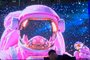

[사진] 역투하는 네일
사이트 : https://news.nate.com/view/20250409n37184?mid=n0100
이미지 링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/pt/2025/04/09/202504091911770667_67f647dcf0ccc.jpg


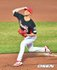

[사진] 역투하는 네일
사이트 : https://news.nate.com/view/20250409n37183?mid=n0100
이미지 링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/pt/2025/04/09/202504091911776332_67f647d86fbe3.jpg


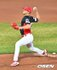

[사진] 역투하는 네일
사이트 : https://news.nate.com/view/20250409n37182?mid=n0100
이미지 링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/pt/2025/04/09/202504091910771548_67f647b819040.jpg


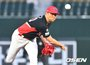

"믿을 수 없을 정도로 합리적인 가격"…뜨는 유망주들 총출동 '아트오앤오'
사이트 : https://news.nate.com/view/20250409n16359?mid=n0100
이미지 링크 : https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/mk/2025/04/09/news-p.v1.20250409.c5c12c69e2ea4b60839e27ddf36b2912_P2.png


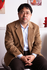

In [8]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from IPython.display import Image, display

section_dict = {
    "최신": "0100",
    "정치": "0200",
    "경제": "0300",
    "사회": "0400",
    "세계": "0500",
    "IT/과학": "0600",
}

def print_news(section_name):
    section = section_dict.get(section_name)
    if section is None:
        print("###############################")
        print("=====요청하신 Key가 없습니다.=====")
        print("###############################")
    else:
        req_param = {"section": section}
        url = "https://news.nate.com/recent?mid=n{section}".format(**req_param)

        print(f"======> {url} {section_name} 뉴스 <======")

        req_header = {
            "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36"
        }

        res = requests.get(url, headers=req_header)

        if res.ok:
            res.encoding = "euc-kr"
            html = res.text
            soup = BeautifulSoup(html, "html.parser")

            li_tag_list = soup.select("ul.mduList1 li h2")
            news_items = soup.select("div.mlt01")

            for item in news_items[:5]:  # 5개까지만 출력
                a_tag = item.select_one("a.lt1")  # lt1: 전체 링크와 제목 포함
                title_tag = a_tag.select_one("h2.tit") if a_tag else None
                img_tag = a_tag.select_one("img") if a_tag else None

                if a_tag and title_tag:
                    title = title_tag.text.strip()
                    link = urljoin("https://news.nate.com", a_tag["href"])
                    print(title)
                    print(f'사이트 : {link}')

                    if img_tag:
                        img_url = urljoin("https:", img_tag["src"])
                        print(f'이미지 링크 : {img_url}')
                        display(Image(img_url))
        else:
            print(f"에러코드 = {res.status_code}")

print_news("정치")
print_news('최신뉴스')
print_news('최신')


# 2-2. 하나의 네이버 웹툰과 1개의 회차에 대한 Image 다운로드 하기 


In [7]:
import requests
from bs4 import BeautifulSoup
import os

def download_webtoon_episode(title, no, url):
    req_header = {'referer': url}
    
    # 이미지 저장 폴더 경로 설정
    imgdir_name = os.path.join('img', title, str(no))
    os.makedirs(imgdir_name, exist_ok=True)

    # 웹 페이지 요청 및 확인
    res = requests.get(url)
    if not res.ok:
        print(f'Error Code = {res.status_code}')
        return

    # 이미지 URL 추출
    soup = BeautifulSoup(res.text, 'html.parser')
    img_url_list = [img_tag['src'] for img_tag in soup.select("img[src*='IMAG01']")]

    # 이미지 다운로드 및 저장
    for img_url in img_url_list:
        res = requests.get(img_url, headers=req_header)
        if res.ok:
            img_data = res.content
            file_name = os.path.basename(img_url)
            file_path = os.path.join(imgdir_name, file_name)
            with open(file_path, 'wb') as file:
                print(f'Writing to {file_path} ({len(img_data):,} bytes)')
                file.write(img_data)
        else:
            print(f'Error Code = {res.status_code} for {img_url}')
download_webtoon_episode('낢이사는이야기', '25', 'https://comic.naver.com/webtoon/detail?titleId=833255&no=49&week=tue')

Writing to img\낢이사는이야기\25\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_1.jpg (166,289 bytes)
Writing to img\낢이사는이야기\25\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_2.jpg (117,581 bytes)
Writing to img\낢이사는이야기\25\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_3.jpg (175,647 bytes)
Writing to img\낢이사는이야기\25\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_4.jpg (140,295 bytes)
Writing to img\낢이사는이야기\25\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_5.jpg (115,277 bytes)
Writing to img\낢이사는이야기\25\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_6.jpg (86,840 bytes)
Writing to img\낢이사는이야기\25\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_7.jpg (151,280 bytes)
Writing to img\낢이사는이야기\25\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_8.jpg (146,198 bytes)
Writing to img\낢이사는이야기\25\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_9.jpg (86,460 bytes)
Writing to img\낢이사는이야기\25\20250310103947_792197c569e377c7f369fe9d6f2bd961_I